In [1]:
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
import datetime as dt
import numpy as np
import pandas as pd
import os
from matplotlib.pyplot import margins, xticks
from setuptools.command.rotate import rotate


In [2]:

dir_name="C:\\volume_dia\\"
dir= os.listdir(dir_name)

arr_files=[]
for i in dir:
    split=os.path.splitext(i)
    file_name=split[0]
    file_ext=split[1]
    if file_ext==".csv":
        full_name= file_name+file_ext
        arr_files.append(full_name)    
    
print(arr_files)    
    #arr_files[i]=i
#print("arr_files", arr_files)


['EURGBP_PERIOD_D1.csv', 'EURUSD_PERIOD_D1.csv', 'GBPUSD_PERIOD_D1.csv']


In [3]:
# 0 = EURGBP
# 1 = EURUSD
# 2 = GBPUSD
df =pd.read_csv(dir_name+arr_files[2], delimiter="\t", encoding="UTF-16")
print(df.head(3))
df_reset =df.reset_index()
print(df_reset)
#print(full_name)
date_time=df["Time"]
#df = pd.read_csv(file)

         Time     Open     High      Low    Close   Volume
0  2024.09.09  1.31310  1.31427  1.30946  1.30996  13984.0
1  2024.09.08  1.31179  1.31379  1.31158  1.31310   3166.0
2  2024.09.06  1.31752  1.32385  1.31096  1.31272  80299.0
     index        Time     Open     High      Low    Close   Volume
0        0  2024.09.09  1.31310  1.31427  1.30946  1.30996  13984.0
1        1  2024.09.08  1.31179  1.31379  1.31158  1.31310   3166.0
2        2  2024.09.06  1.31752  1.32385  1.31096  1.31272  80299.0
3        3  2024.09.05  1.31436  1.31848  1.31365  1.31752  62701.0
4        4  2024.09.04  1.31121  1.31747  1.31005  1.31436  64341.0
..     ...         ...      ...      ...      ...      ...      ...
375    375  2023.06.27  1.27100  1.27587  1.27030  1.27450  55649.0
376    376  2023.06.26  1.27285  1.27478  1.26874  1.27100  51662.0
377    377  2023.06.25  1.27073  1.27307  1.27073  1.27285   2484.0
378    378  2023.06.23  1.27460  1.27484  1.26849  1.27156  58324.0
379    379  2023

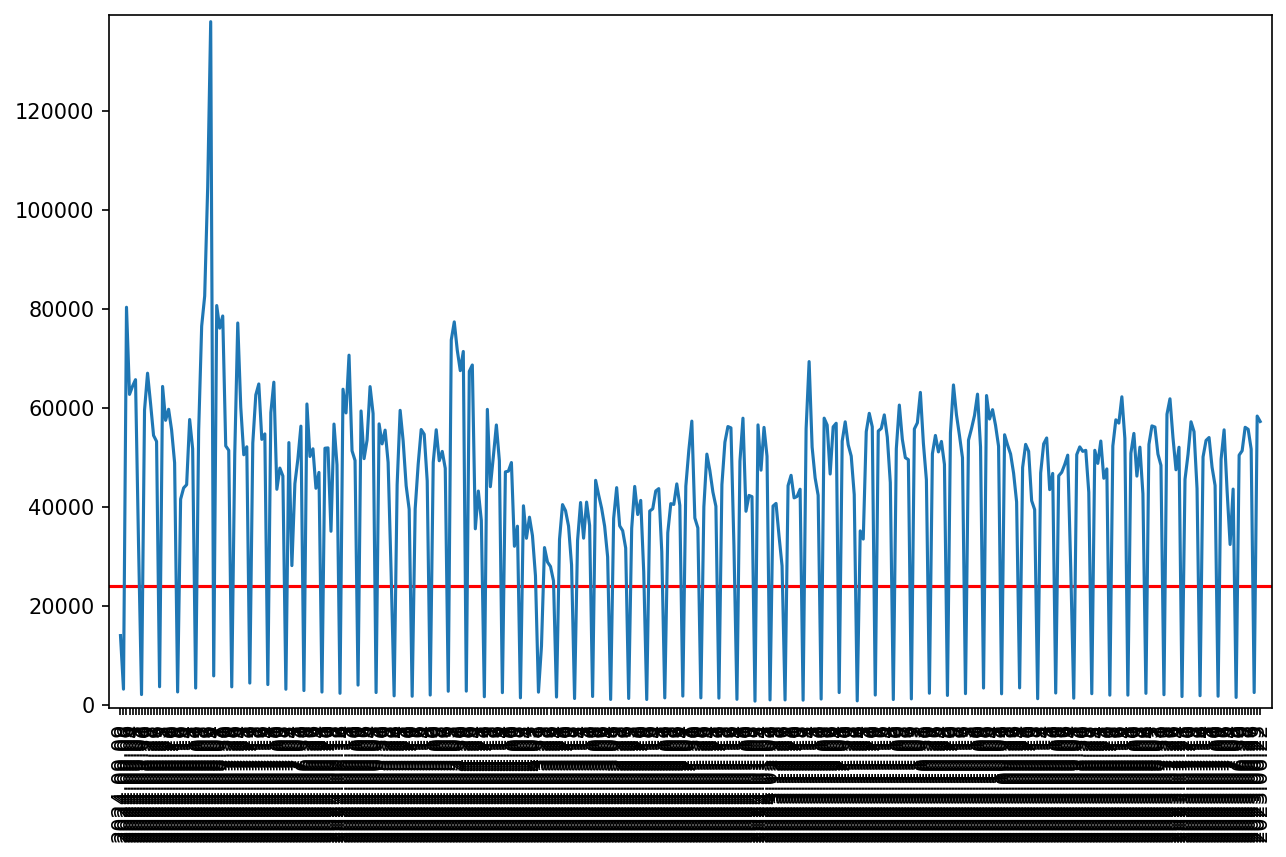

In [11]:
df_datetime = pd.to_datetime(date_time)
filter_year =df_datetime.dt.year>=2024
filter0= df_datetime.dt.month==3
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
limit =24000

# plt.plot(filter_low_volume["Time"],filter_low_volume["Volume"])
plt.axhline(y=limit, color="r", linestyle="-")
plt.plot(df["Time"],df["Volume"])
plt.margins(.01)

plt.show()


           Time     Open     High      Low    Close   Volume
0    2024.09.09  1.31310  1.31427  1.30946  1.30996  13984.0
1    2024.09.08  1.31179  1.31379  1.31158  1.31310   3166.0
7    2024.09.01  1.31294  1.31328  1.31188  1.31292   2075.0
13   2024.08.25  1.32084  1.32191  1.32037  1.32135   3657.0
19   2024.08.18  1.29325  1.29499  1.29312  1.29459   2601.0
..          ...      ...      ...      ...      ...      ...
353  2023.07.23  1.28429  1.28576  1.28429  1.28516   1674.0
359  2023.07.16  1.30902  1.30978  1.30834  1.30887   1843.0
365  2023.07.09  1.28281  1.28409  1.28272  1.28371   1738.0
371  2023.07.02  1.26949  1.27033  1.26885  1.26930   1498.0
377  2023.06.25  1.27073  1.27307  1.27073  1.27285   2484.0

[66 rows x 6 columns]


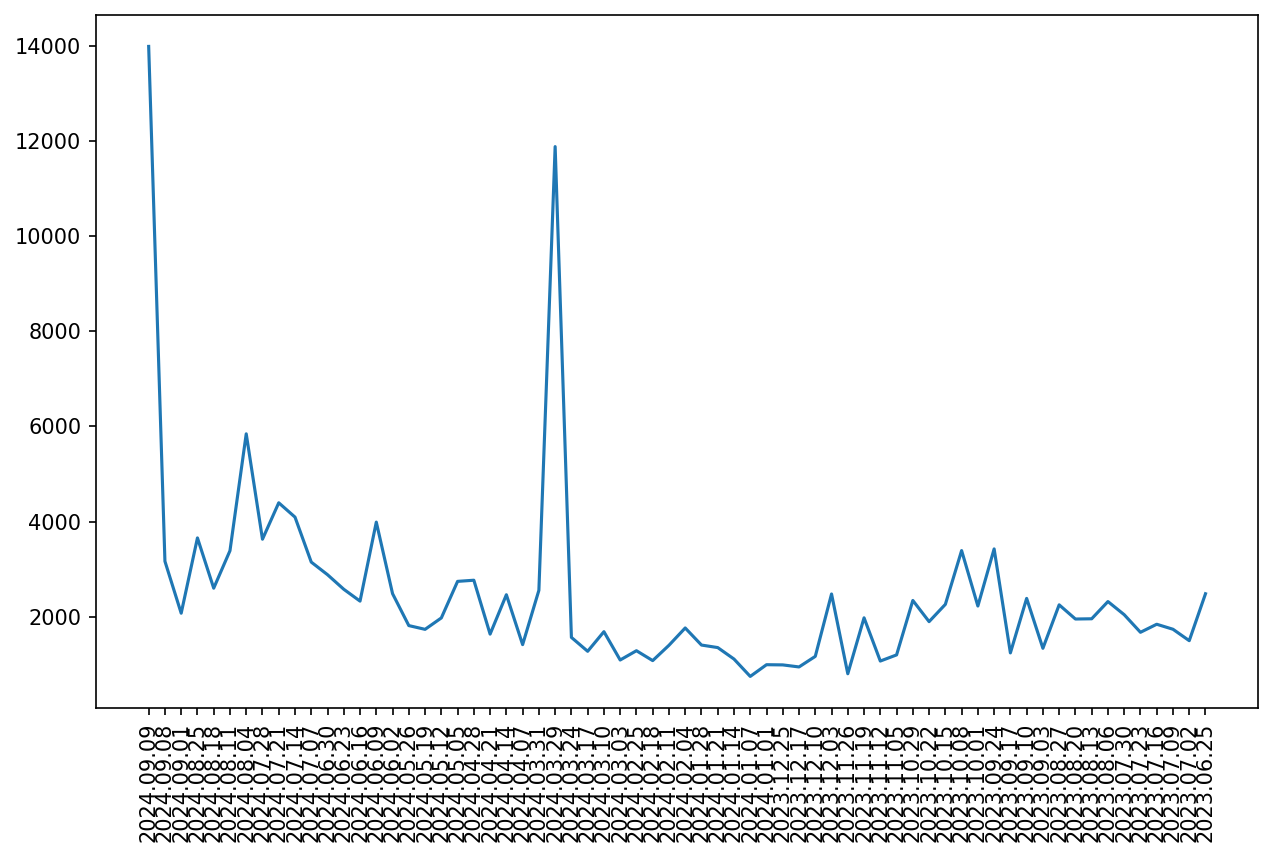

In [12]:
# baixo ocorrer maioritariamente  ao domingo devido, bolsa americana e europeia estar fechada e abertura da bolsa asiatica



filter_low_volume= df[df["Volume"]<limit]
print (filter_low_volume)
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.plot(filter_low_volume["Time"],filter_low_volume["Volume"])
# plt.margins(.01)
# plt.show()

count      276.000000
mean     47473.394928
std       8232.724959
min      25029.000000
25%      42315.750000
50%      49327.500000
75%      53822.750000
max      59700.000000
Name: Volume, dtype: float64

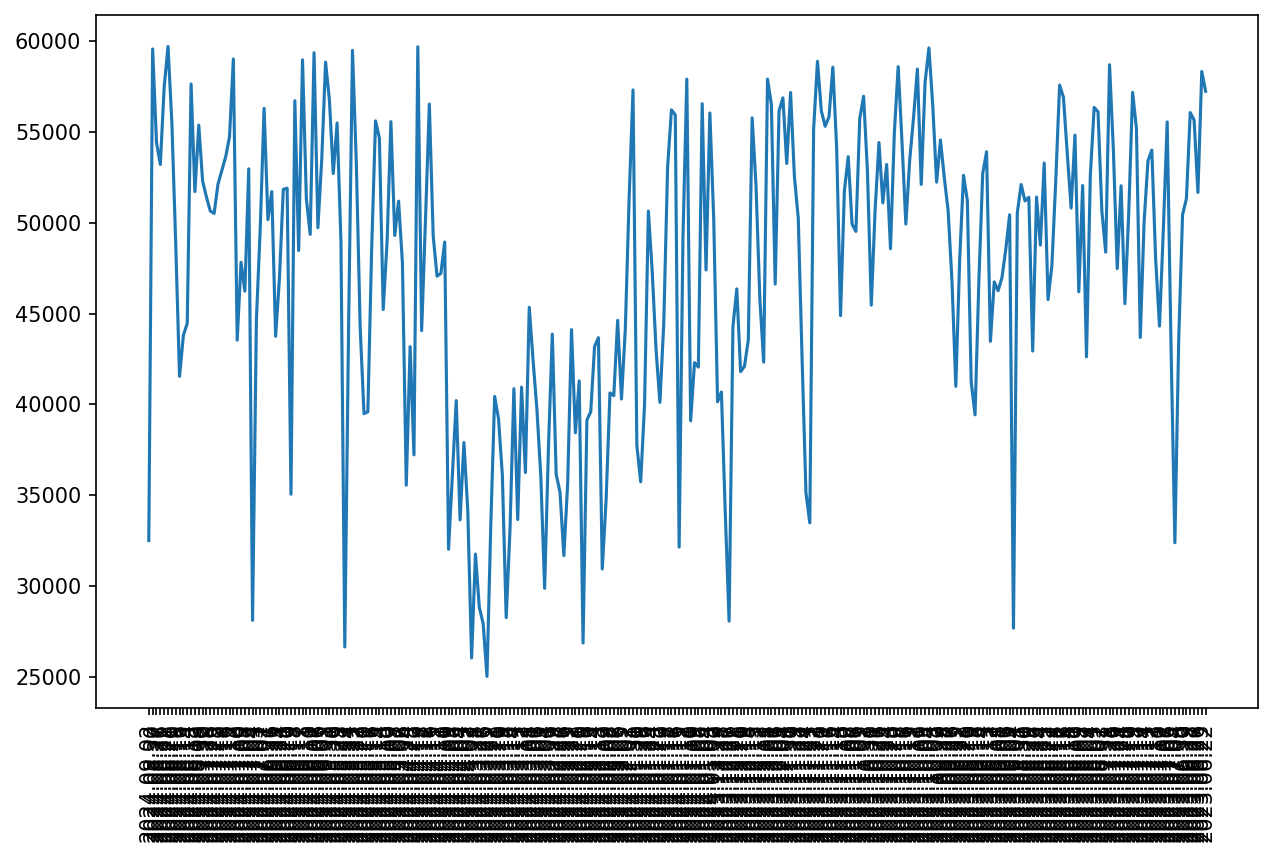

In [13]:
# torna dificil tracar qualquer tipo de relação do volume ao preço de fechamento, já que o volume tende pouco dentro eixo por volta do 50k, com variação de 1 STD (removido outlier e baixo volume)
#  faz pouco sentido GBPUSD ter um volume maior que EURUSD, sendo que EURUSD tem os maior volumes de todos pares transacionados, por isso acredito que esse volume de tick seja eficiente na emqual tipo de relação com preço.

plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
filter_high_volume= df[df["Volume"]>limit] 
outlier = (df[(df["Volume"]<60000) & (df["Volume"]>limit)])
plt.plot(outlier["Time"],outlier["Volume"])
outlier["Volume"].describe()
# plt.show()


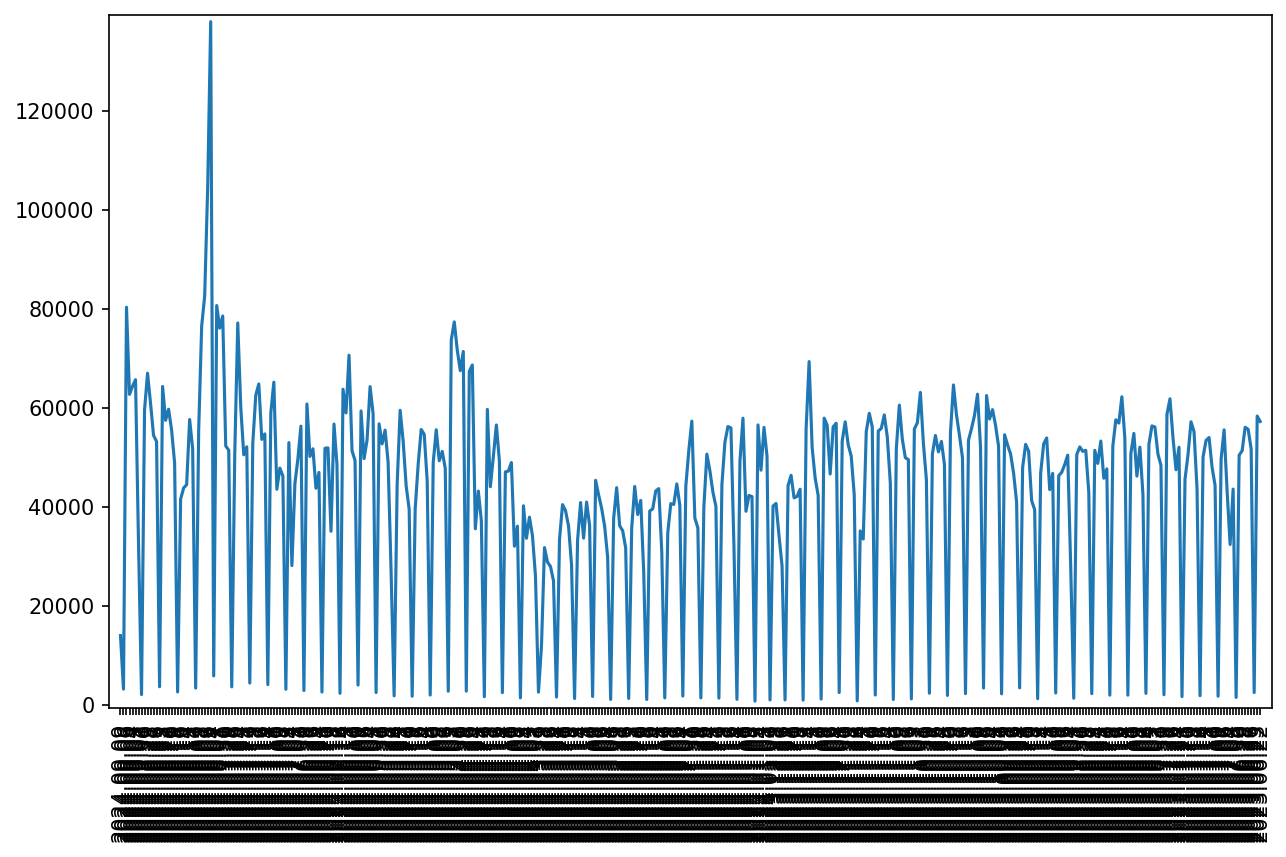

In [7]:

axis_x = df["Time"]
axis_y = df["Volume"]

plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.margins(.01)
plt.plot(axis_x,axis_y)
plt.show()

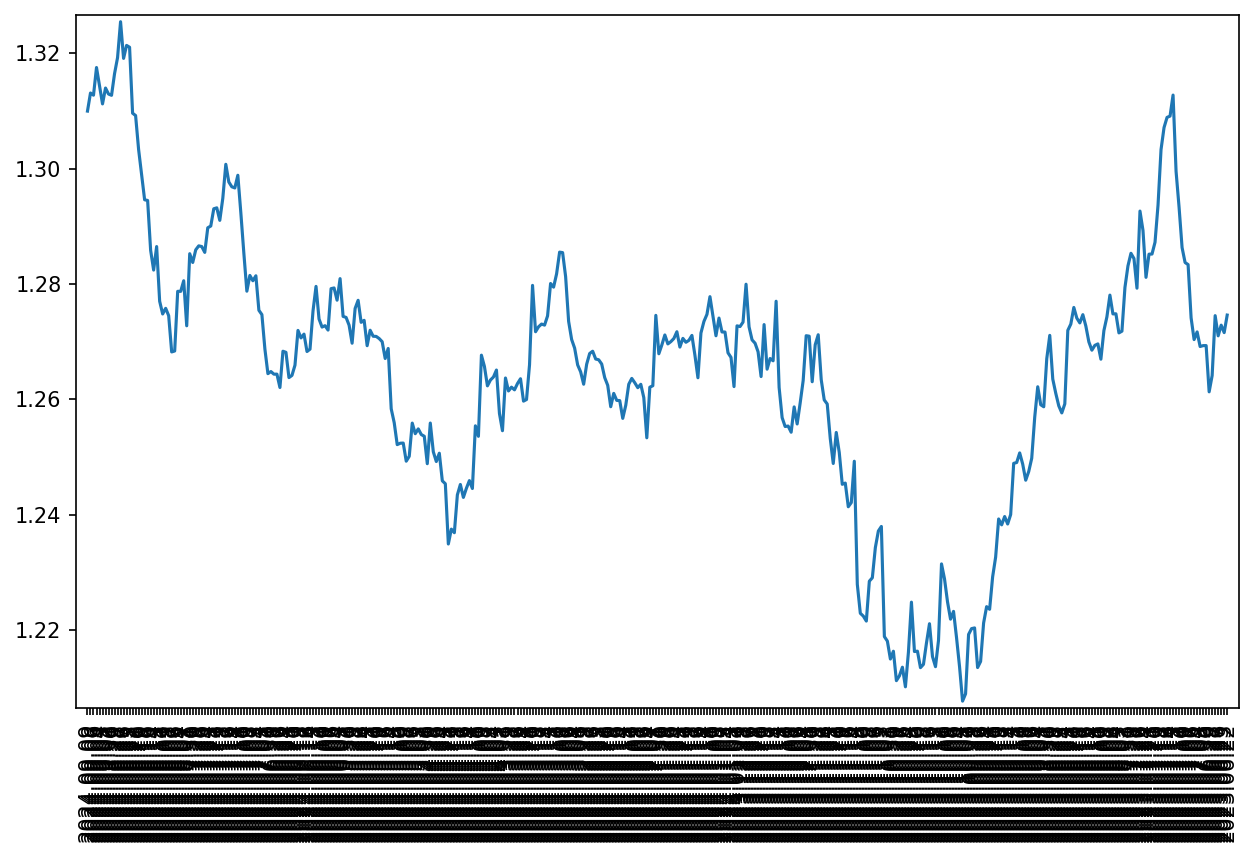

In [8]:


axis_x = df["Time"]
axis_y = df["Close"]
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.margins(.01)
plt.plot(axis_x, axis_y)